In [1]:
from presto_mod.pulsed import pulse_test as pt
from presto_mod.pulsed import pulsed_test_with_probe as ptpr

import numpy as np
import scipy.io as sio
from scipy.io import savemat

import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
import time
import pyvisa

import os
Global_data_adress = r"F:\ColdMeasurements\NanoY\Data"
exp_name = 'Pulsed_measurements_T1_corr'
file_folder = Global_data_adress+'\\'+exp_name
if not os.path.exists(file_folder):
  os.mkdir(file_folder)
  print("Folder %s created!" % file_folder)
else:
  print("Folder %s already exists" % file_folder)

Folder F:\ColdMeasurements\NanoY\Data\Pulsed_measurements_T1_corr already exists


In [2]:
presto_address = "169.254.3.14"  # your Presto IP address

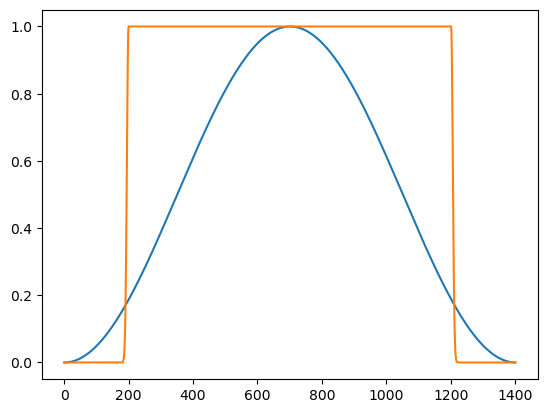

In [8]:
nr_samples = 1400
edge = 10
t = np.linspace(1,nr_samples,nr_samples)

def gate(t, start, stop):
    return np.heaviside(t-start, 1) - np.heaviside(t-stop, 1)

def gaussian(t, cent, sig, start, end):
    Result = np.zeros(int(t[-1]))
    Result[start:end] = np.exp(-np.power((t[start:end] - cent) / sig, 2.0) / 2)
    return Result
    
# def sin2(nr_of_samples, start=0, stop=9, sig_feft=2, sig_right=0.001): 
#     t = np.linspace(0, 10, number_of_samples)
#     return gate(t, start, stop) + gaussian(t, cent=start, sig=sig_feft)*(1-np.heaviside(t-start, 1)) + gaussian(t, cent=stop, sig=sig_right)*(np.heaviside(t-stop, 1))

def Gauss(nr_samples,drag,edge=200,sig_left=5,sig_right=5):
    t = np.linspace(1, nr_samples, nr_samples, endpoint=True)
    Left = gaussian(t, edge, sig_left, 0, edge)
    Middle = gate(t, edge+1, t[-edge])
    Right = gaussian(t, int(t[-edge]), sig_right,int(t[-edge-1]),int(t[-1]))
    return Left + Middle + Right

def sin2(nr_samples: int, drag: float = 0.0) -> np.ndarray:
    x = np.linspace(0.0, 1.0, nr_samples, endpoint=False)
    return np.sin(np.pi * x) ** 2

plt.plot(t, sin2(nr_samples))
plt.plot(t, Gauss(nr_samples,0))
# print(Gauss(nr_samples,edge,1,1))
# print(nr_samples)

In [9]:
print(datetime.now())

omega2 = 5.768314e9*2
lo_freq = (omega2 - 0.436e9)/2
if_freq  = omega2-lo_freq
Readout_freq = 5.768314e9
print(lo_freq)
print(if_freq)
print(Readout_freq)

delay = 200e-9
LO_duration=2000e-9
IF_duration=1400e-9
PR_duration = 2000e-9
Readout_duration = delay*4+PR_duration

experiment = ptpr.T1(
        LO_port=3, # LO
        IF_port=1, # IF
        PR_port=8,  # Probe
        readout_port1=7,  # TWPA 2
        readout_port2=8,  # TWPA 1
        file_folder = file_folder,
        file_name = 'Pulse_test_pulse_duration',
        
        LO_freq=lo_freq,
        LO_amp=0.0/np.sqrt(2),
        LO_duration=LO_duration,
        
        IF_freq=if_freq,
        IF_amp = 0.0/2,
        IF_duration=IF_duration,             # pulse duration

        PR_freq = Readout_freq,
        PR_amp = 0.1,
        PR_duration = PR_duration, 

        readout_freq=Readout_freq,
        
        readout_duration=Readout_duration,
        delay=delay,
        
        wait_delay=50e-6,
        readout_delay=200e-9,
        num_repeats=1, 
        num_averages=1000000,
        envelope_function = Gauss, 
    
    )

2024-11-27 16:40:07.026258
5550314000.0
5986314000.0
5768314000.0


In [10]:
att_list = experiment.run(presto_address)

Run finishedted at 2024-11-27 16:40:07.622199


In [11]:
data = att_list['data'][0]
data.shape

(2, 2800)

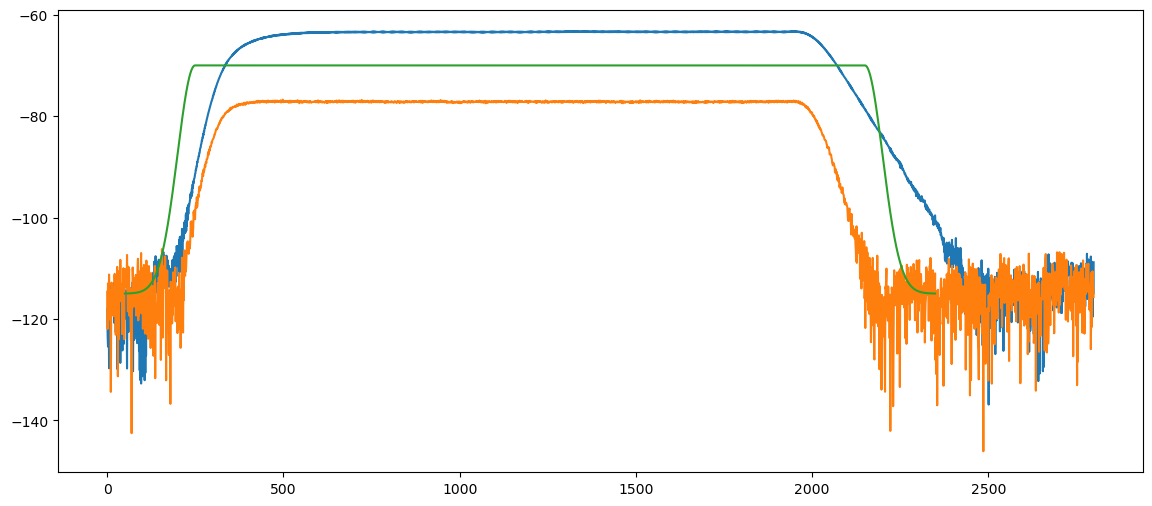

In [7]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(20*np.log10(np.abs(data[0])))
ax.plot(20*np.log10(np.abs(data[1])))
plt.plot(np.arange(len(data[1])-500)+50, Gauss(len(data[1])-500,0)*45-115)

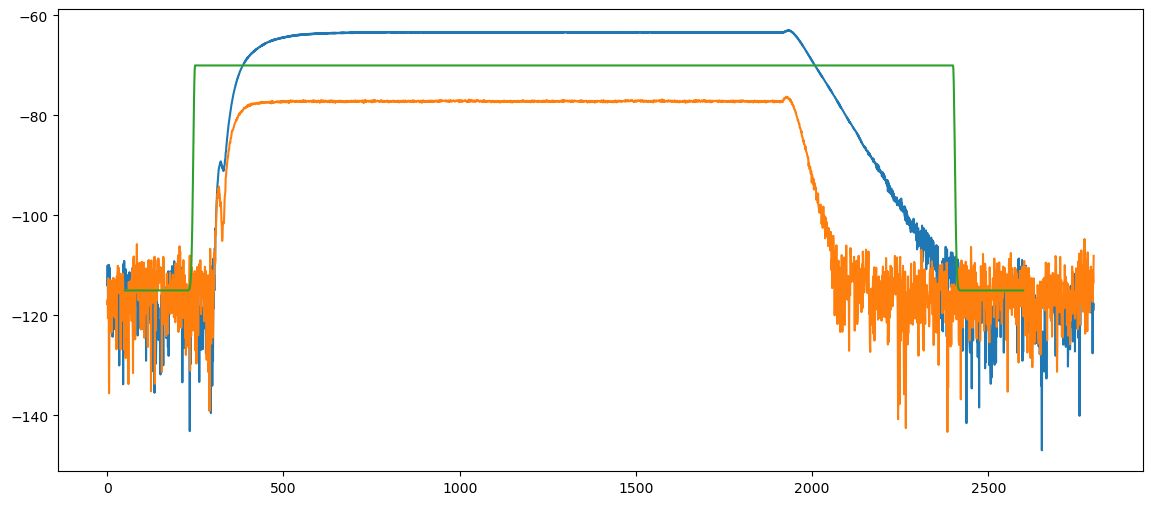

In [12]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(20*np.log10(np.abs(data[0])))
ax.plot(20*np.log10(np.abs(data[1])))
plt.plot(np.arange(len(data[1])-250)+50, Gauss(len(data[1])-250,0)*45-115)

# Perform multiple temporal sweeps with same conditions

In [13]:
print(datetime.now())

omega2 = 5.768314e9*2
lo_freq = (omega2 - 0.436e9)/2
if_freq  = omega2-lo_freq
Readout_freq = 5.768314e9
print(lo_freq)
print(if_freq)
print(Readout_freq)

delay = 100e-9
LO_duration=4600e-9
IF_duration=4000e-9
PR_duration = 4600e-9
Readout_duration = delay*4+PR_duration

experiment = ptpr.T1(
        LO_port=3, # LO
        IF_port=1, # IF
        PR_port=8,  # Probe
        readout_port1=7,  # TWPA 2
        readout_port2=8,  # TWPA 1
        file_folder = file_folder,
        file_name = 'Pulse_test_pulse_duration',
        
        LO_freq=lo_freq,
        LO_amp=0.0/np.sqrt(2),
        LO_duration=LO_duration,
        
        IF_freq=if_freq,
        IF_amp = 0.0/2,
        IF_duration=IF_duration,             # pulse duration

        PR_freq = Readout_freq,
        PR_amp = 0.1,
        PR_duration = PR_duration, 

        readout_freq=Readout_freq,
        
        readout_duration=Readout_duration,
        delay=delay,
        
        wait_delay=100e-6,
        readout_delay=200e-9,
        num_repeats=2000, 
        num_averages=1000000,
        envelope_function = Gauss, 
    
    )

2024-11-27 18:19:58.145167
5550314000.0
5986314000.0
5768314000.0


# $$\textcolor{red}{\text{The sweep over 2000 iterations is set}}$$

The STD seems to saturate faster, then steadystate is reached

A strange spike in the beginning of gauss

In [14]:
print(datetime.now())
att_list = experiment.run(presto_address)
print(datetime.now())

data = att_list['data']
data.shape

2024-11-27 18:21:20.391622
Run finishedted at 2024-11-27 18:21:20.396138
2024-11-30 04:38:03.012981


(2000, 2, 5000)

In [15]:
TWPA1 = data[:,0,:]
TWPA2 = data[:,0,:]

TWPA1_db= 20*np.log10(np.abs(TWPA2))

TWPA1_db_cut = TWPA1_db

duration = np.arange(len(TWPA1_db_cut[0]))
itera = np.arange(len(TWPA1_db_cut))

TWPA1.shape

(2000, 5000)

In [16]:
data_mat = dict()
data_mat['TWPA_data'] = data
now = datetime.now()
file_name = '2000_sweeps_with_a_shunt'
full_file_name = file_folder + '\\' + file_name + now.strftime(r'--%Y.%m.%d__%H.%M.%S') + '.mat'
savemat(full_file_name, data_mat)

Text(0.5, 0, 'duration, ns')

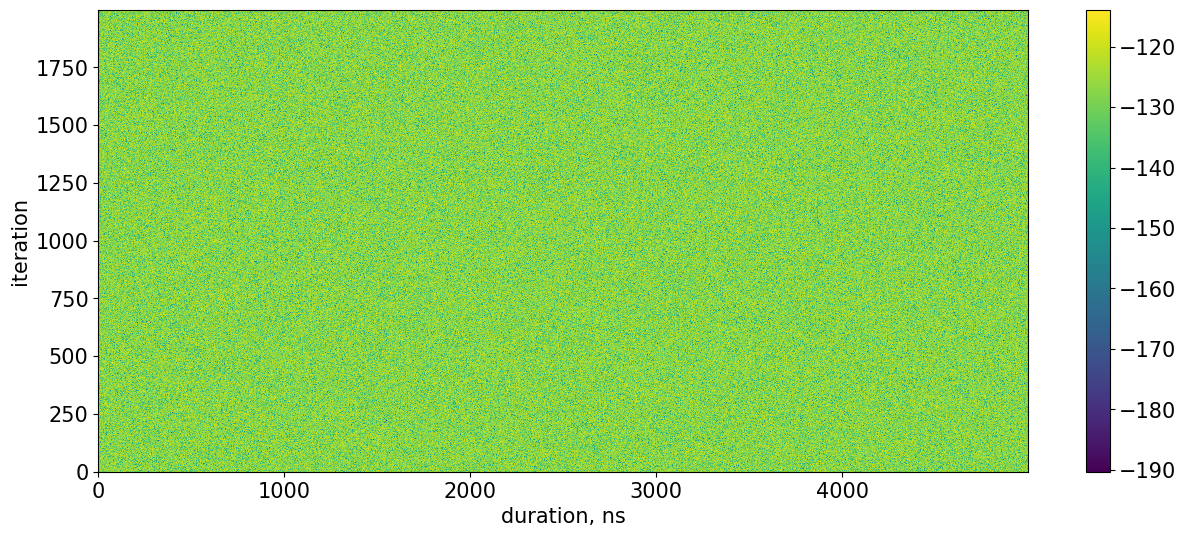

In [17]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15,6))

TWPA1_db= 20*np.log10(np.abs(TWPA1))

TWPA1_db_cut = TWPA1_db

duration = np.arange(len(TWPA1_db_cut[0]))
itera = np.arange(len(TWPA1_db_cut))

c = ax.pcolor(duration, itera, TWPA1_db_cut, cmap = 'viridis')
fig.colorbar(c, ax=ax)
ax.set_ylabel('iteration')
ax.set_xlabel('duration, ns')

Text(0.5, 0, 'delay, ns')

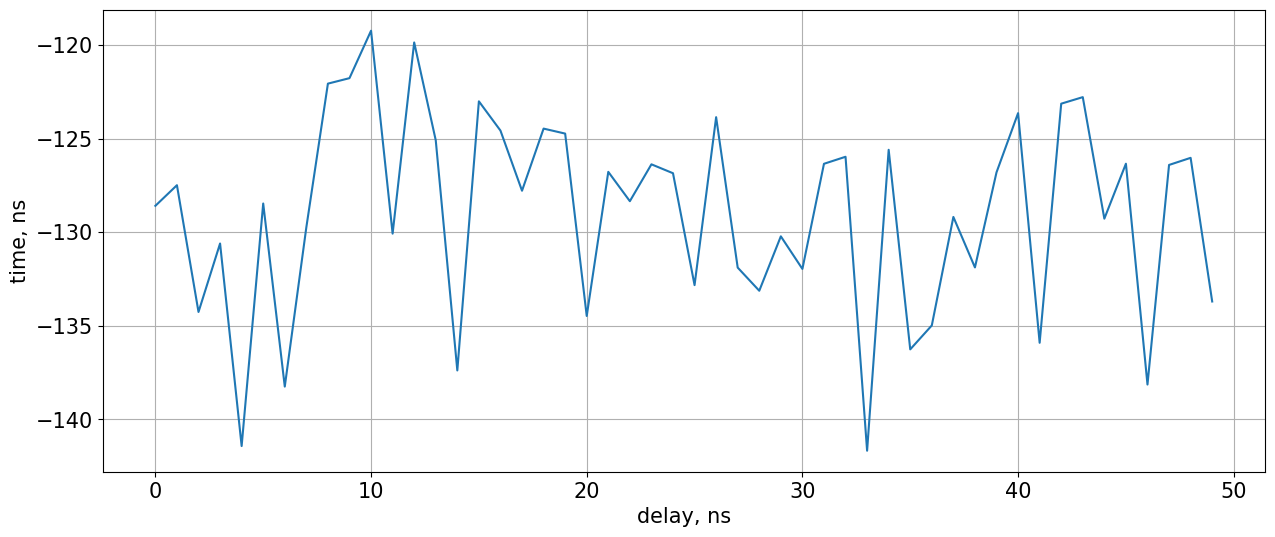

In [18]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15,6))
c = ax.plot(TWPA1_db[10,:50])
ax.grid()
ax.set_ylabel('time, ns')
ax.set_xlabel('delay, ns')

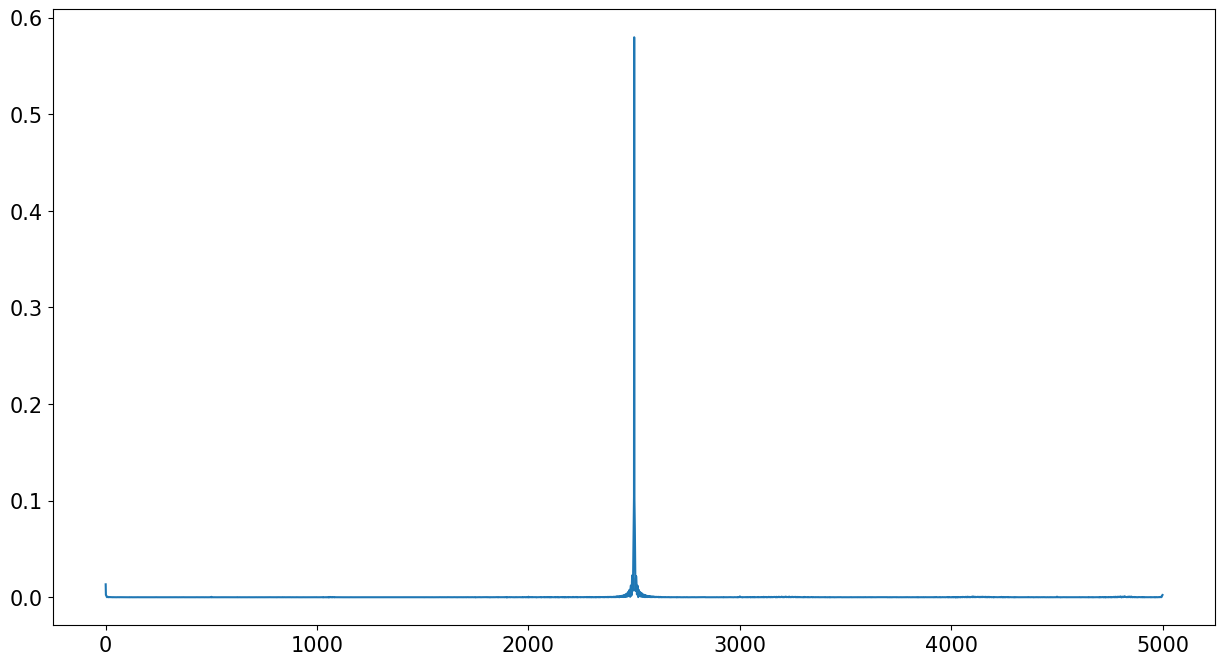

In [34]:
fig, ax = plt.subplots(figsize=(15,8))
# ax.plot(np.abs(np.fft.fftshift(np.fft.fft(np.mean(data[:,0,:], axis = 0)))))
# ax.plot(np.abs(data[0,0,:]))
ax.plot(np.abs(np.fft.fftshift(np.fft.fft(data[0,1,:]))))
# ax.set_ylim(0,0.01)

Text(0.5, 0, 'duration, ns')

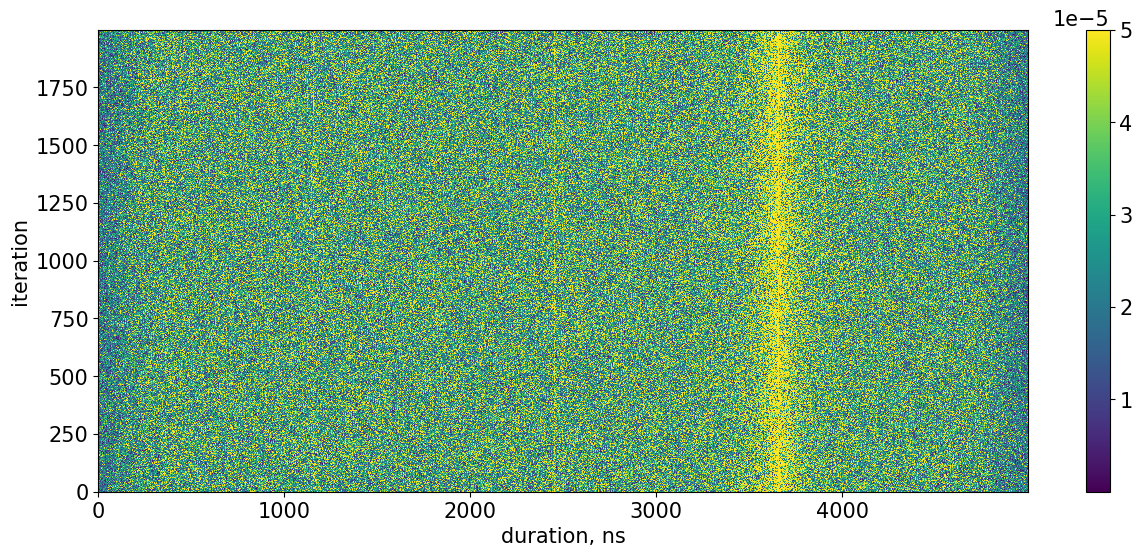

In [31]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15,6))

TWPA1_db= 20*np.log10(np.abs(TWPA1))

TWPA1_db_cut = TWPA1_db

duration = np.arange(len(TWPA1_db_cut[0]))
itera = np.arange(len(TWPA1_db_cut))
fft_heatmap = np.abs(np.fft.fftshift(np.fft.fft(data[:,0,:])))

c = ax.pcolor(duration, itera, fft_heatmap, cmap = 'viridis', vmax=0.00007)
fig.colorbar(c, ax=ax)
ax.set_ylabel('iteration')
ax.set_xlabel('duration, ns')

Text(0.5, 0, 'delay, ns')

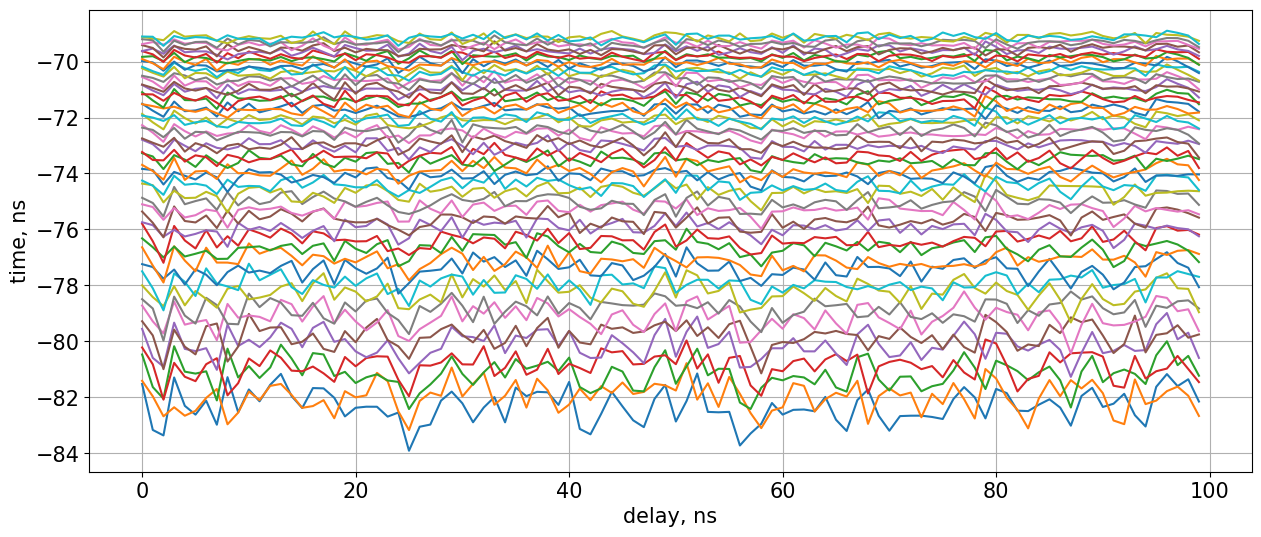

In [98]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15,6))
c = ax.plot(TWPA1_db[:,150:200])
ax.grid()
ax.set_ylabel('time, ns')
ax.set_xlabel('delay, ns')

Text(0.5, 0, 'delay, ns')

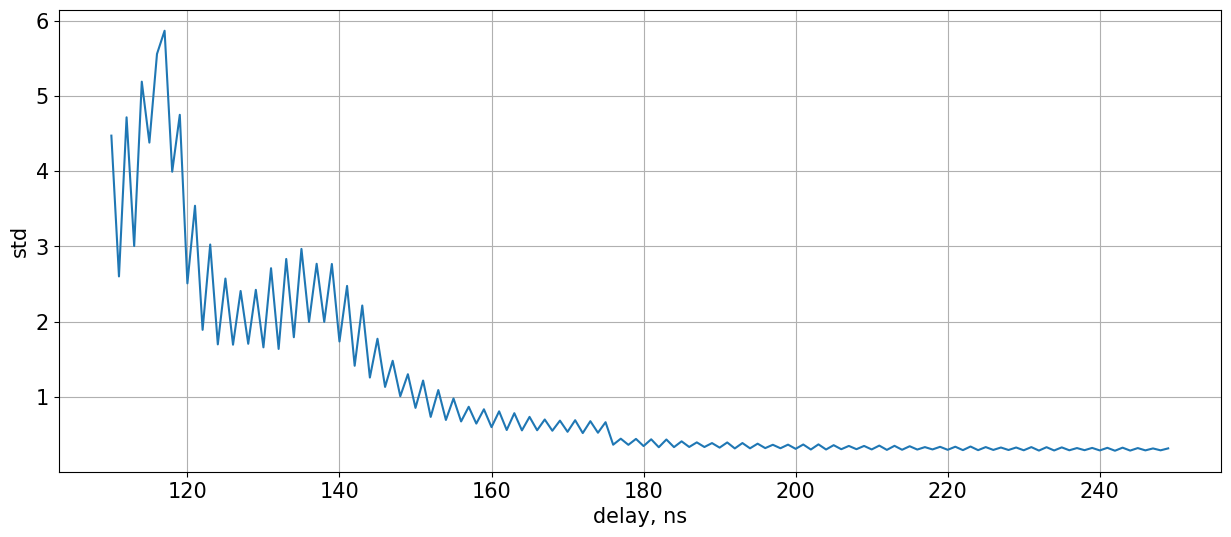

In [130]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15,6))
c = ax.plot(duration[110:250], np.std(TWPA1_db.T, axis = 1)[110:250])
ax.grid()
ax.set_ylabel('std')
ax.set_xlabel('delay, ns')